In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
import pdb
setup_text_plots(fontsize=25, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

In [5]:
class Filter(object):
    
    def __init__(self, name=None, bandcenter=None, FWHM=None, wl=None, response=None, notes=''):
        self.name=name
        self.bandcenter=bandcenter
        self.FWHM=FWHM
        self.wl=wl
        self.response=response
        self.notes=notes
        
    def __str__(self):
        string = 'Filter: \n------------\n'+\
            '- Name : '+"%s" % (self.name)+'\n'+\
            '- Bandcenter (um)  : '+"%s" % (self.bandcenter)+'\n'+\
            '- Full width at half max (um)  : '+"%s" % (self.FWHM)+'\n'+\
            '- Wavelength array (um)  : '+"%s" % (self.wl)+'\n'+\
            '- Response : '+"%s" % (self.response)+'\n'+\
            '- Notes  : '+"%s" % (self.notes)+'\n'
        return string

In [6]:
U = Filter(name='U', bandcenter=365.6, FWHM=34.0)

In [48]:
def read_jc():
    U = np.genfromtxt('coronagraph/filters/UBVRI/bess-u.pass')
    U[:,0] = U[:,0]/1e4
    B = np.genfromtxt('coronagraph/filters/UBVRI/bess-b.pass')
    B[:,0] = B[:,0]/1e4
    V = np.genfromtxt('coronagraph/filters/UBVRI/bess-v.pass')
    V[:,0] = V[:,0]/1e4
    R = np.genfromtxt('coronagraph/filters/UBVRI/bess-r.pass')
    R[:,0] = R[:,0]/1e4
    I = np.genfromtxt('coronagraph/filters/UBVRI/bess-i.pass')
    I[:,0] = I[:,0]/1e4
    filters = np.array([U,B,V,R,I])
    filter_names = ['U','B','V','R','I']
    bandcenters = np.array([365.6, 435.3, 547.7, 634.9, 800.0]) / 1e3
    FWHM = np.array([34.0, 78.1, 99.1, 106.56, 289.2]) / 1e3
    return filters, filter_names, bandcenters, FWHM

In [90]:
class johnson_cousins(object):
    
    def __init__(self):
        
        filters, filter_names, bandcenters, FWHM = read_jc()
        
        self.U=Filter(name='U', bandcenter=bandcenters, FWHM=FWHM[0], wl=filters[0][:,0], response=filters[0][:,1])
        self.B=Filter(name='B', bandcenter=bandcenters, FWHM=FWHM[1], wl=filters[1][:,0], response=filters[1][:,1])
        self.V=Filter(name='V', bandcenter=bandcenters, FWHM=FWHM[2], wl=filters[2][:,0], response=filters[2][:,1])
        self.R=Filter(name='R', bandcenter=bandcenters, FWHM=FWHM[3], wl=filters[3][:,0], response=filters[3][:,1])
        self.I=Filter(name='I', bandcenter=bandcenters, FWHM=FWHM[4], wl=filters[4][:,0], response=filters[4][:,1])

In [31]:
jc = johnson_cousins()

In [32]:
print jc.B

Filter: 
------------
- Name : B
- Bandcenter (um)  : [ 0.3656  0.4353  0.5477  0.6349  0.8   ]
- Full width at half max (um)  : 0.0781
- Wavelength array (um)  : [ 0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56]
- Response : [ 0.     0.03   0.134  0.567  0.92   0.978  1.     0.978  0.935  0.853
  0.74   0.64   0.536  0.424  0.325  0.235  0.15   0.095  0.043  0.009  0.   ]
- Notes  : 



In [79]:
def read_landsat():
    blue = np.genfromtxt('coronagraph/filters/LANDSAT/Blue.txt', skip_header=1)
    green = np.genfromtxt('coronagraph/filters/LANDSAT/Green.txt', skip_header=1)
    red = np.genfromtxt('coronagraph/filters/LANDSAT/Red.txt', skip_header=1)
    coastal = np.genfromtxt('coronagraph/filters/LANDSAT/CostalAerosol.txt', skip_header=1)
    cirrus = np.genfromtxt('coronagraph/filters/LANDSAT/Cirrus.txt', skip_header=1)
    nir = np.genfromtxt('coronagraph/filters/LANDSAT/NIR.txt', skip_header=1)
    pan = np.genfromtxt('coronagraph/filters/LANDSAT/Pan.txt', skip_header=1)
    swir1 = np.genfromtxt('coronagraph/filters/LANDSAT/SWIR1.txt', skip_header=1)
    swir2 = np.genfromtxt('coronagraph/filters/LANDSAT/SWIR2.txt', skip_header=1)
    LANDSAT_names = ['Coastal Aerosols','Blue','Green','Red','NIR','SWIR1','SWIR2','Pan','Cirrus']
    titles = ['wl','response','std','bandwidth','FWHM_low','FWHM_high','bandcenter']
    wl = [coastal[:,0]/1e3, blue[:,0]/1e3, green[:,0]/1e3, red[:,0]/1e3, nir[:,0]/1e3, swir1[:,0]/1e3, swir2[:,0]/1e3, pan[:,0]/1e3, cirrus[:,0]/1e3]
    response = [coastal[:,1], blue[:,1], green[:,1], red[:,1], nir[:,1], swir1[:,1], swir2[:,1], pan[:,1], cirrus[:,1]]
    FWHM = np.array([15.98, 60.04, 57.33, 37.47, 28.25, 84.72, 186.66, 172.40, 20.39]) / 1e3
    bandcenters = np.array([442.96, 482.04, 561.41, 654.59, 864.67, 1608.86, 2200.73, 589.50, 1373.43]) / 1e3
    return wl, response, LANDSAT_names, FWHM, bandcenters

In [87]:
class landsat(object):
    
    def __init__(self):
        
        wl, response, LANDSAT_names, FWHM, bandcenters = read_landsat()
        
        self.CA=Filter(name=LANDSAT_names[0], bandcenter=bandcenters[0], FWHM=FWHM[0], wl=wl[0], response=response[0])
        self.B=Filter(name=LANDSAT_names[1], bandcenter=bandcenters[1], FWHM=FWHM[1], wl=wl[1], response=response[1])
        self.G=Filter(name=LANDSAT_names[2], bandcenter=bandcenters[2], FWHM=FWHM[2], wl=wl[2], response=response[2])
        self.R=Filter(name=LANDSAT_names[3], bandcenter=bandcenters[3], FWHM=FWHM[3], wl=wl[3], response=response[3])
        self.NIR=Filter(name=LANDSAT_names[4], bandcenter=bandcenters[4], FWHM=FWHM[4], wl=wl[4], response=response[4])
        self.SWIR1=Filter(name=LANDSAT_names[5], bandcenter=bandcenters[5], FWHM=FWHM[5], wl=wl[5], response=response[5])
        self.SWIR2=Filter(name=LANDSAT_names[6], bandcenter=bandcenters[6], FWHM=FWHM[6], wl=wl[6], response=response[6])
        self.Pan=Filter(name=LANDSAT_names[7], bandcenter=bandcenters[7], FWHM=FWHM[7], wl=wl[7], response=response[7])
        self.Cirrus=Filter(name=LANDSAT_names[8], bandcenter=bandcenters[8], FWHM=FWHM[8], wl=wl[8], response=response[8])

In [88]:
lsat = landsat()

In [91]:
print lsat.CA

Filter: 
------------
- Name : Coastal Aerosols
- Bandcenter (um)  : 0.44296
- Full width at half max (um)  : 0.01598
- Wavelength array (um)  : [ 0.427  0.428  0.429  0.43   0.431  0.432  0.433  0.434  0.435  0.436
  0.437  0.438  0.439  0.44   0.441  0.442  0.443  0.444  0.445  0.446
  0.447  0.448  0.449  0.45   0.451  0.452  0.453  0.454  0.455  0.456
  0.457  0.458  0.459]
- Response : [  7.30000000e-05   6.09000000e-04   1.62800000e-03   3.42100000e-03
   8.01900000e-03   2.47670000e-02   8.56880000e-02   2.54149000e-01
   5.17821000e-01   7.65117000e-01   9.08749000e-01   9.58204000e-01
   9.77393000e-01   9.83790000e-01   9.89052000e-01   9.86713000e-01
   9.93683000e-01   9.93137000e-01   1.00000000e+00   9.96969000e-01
   9.82780000e-01   9.72692000e-01   9.05808000e-01   7.45606000e-01
   4.71329000e-01   2.26412000e-01   9.28600000e-02   3.66030000e-02
   1.45370000e-02   5.82900000e-03   2.41400000e-03   9.84000000e-04
   2.55000000e-04]
- Notes  : 



## The `Shelf` has many `Wheels`, each `Wheel` has many `Filters` 

In [177]:
class Wheel(object): 
    def __init__(self):
        pass
    
    def add_new_filter(self, filt, name='new_filter'):
        setattr(self, name, filt)
        
    def __str__(self):
        string = []
        for attr, value in self.__dict__.iteritems():
            string.append(attr)
        print string 
        return ''#str(string)

In [182]:
class Shelf(object):
    
    def __init__(self):
        #self.jc_ubvri=johnson_cousins()
        #self.landsat=landsat()
        pass
    
    def add_new_wheel(self, wheel, name='new_wheel'):
        setattr(self, name, wheel)
        
    def __str__(self):
        string = []
        for attr, value in self.__dict__.iteritems():
            string.append(attr)
        print string 
        return ''#str(string)

In [151]:
shelf = Shelf()

In [152]:
print shelf

['jc_ubvri', 'landsat']


In [111]:
setattr(shelf, 'jc_ubvri', johnson_cousins())

In [112]:
setattr(shelf, 'landsat', landsat())

In [132]:
custom = Wheel()

In [114]:
setattr(custom, 'R1', Filter())
setattr(custom, 'R2', Filter())

In [117]:
setattr(shelf, 'josh', custom)

In [127]:
wof.add_new_wheel(custom)

In [133]:
custom_wheel = Wheel()

In [134]:
custom_wheel.add_new_filter(shelf.jc_ubvri.U, name=shelf.jc_ubvri.U.name)

In [135]:
custom_wheel.add_new_filter(shelf.jc_ubvri.B, name=shelf.jc_ubvri.B.name)

In [140]:
custom_wheel.add_new_filter(Filter(name='R1', bandcenter=0.45, FWHM=0.05, wl=None, response=None, notes=''), name='new')

In [142]:
print custom_wheel.new

Filter: 
------------
- Name : R1
- Bandcenter (um)  : 0.45
- Full width at half max (um)  : 0.05
- Wavelength array (um)  : None
- Response : None
- Notes  : 



In [158]:
def construct_jc(shelf):
    
    # Add try, except IOError
    
    # Read in Johnson-Cousins filter data
    U = np.genfromtxt('coronagraph/filters/UBVRI/bess-u.pass')
    U[:,0] = U[:,0]/1e4
    B = np.genfromtxt('coronagraph/filters/UBVRI/bess-b.pass')
    B[:,0] = B[:,0]/1e4
    V = np.genfromtxt('coronagraph/filters/UBVRI/bess-v.pass')
    V[:,0] = V[:,0]/1e4
    R = np.genfromtxt('coronagraph/filters/UBVRI/bess-r.pass')
    R[:,0] = R[:,0]/1e4
    I = np.genfromtxt('coronagraph/filters/UBVRI/bess-i.pass')
    I[:,0] = I[:,0]/1e4
    filters = np.array([U,B,V,R,I])
    filter_names = ['U','B','V','R','I']
    bandcenters = np.array([365.6, 435.3, 547.7, 634.9, 800.0]) / 1e3
    FWHM = np.array([34.0, 78.1, 99.1, 106.56, 289.2]) / 1e3
    
    # Create new wheel for filters
    new_wheel = Wheel()
    
    # Create Filters; add to new wheel
    for i in range(len(filters)): 
        filt = Filter(name=filter_names[i], bandcenter=bandcenters[i],FWHM=FWHM[i],\
                      wl=filters[i][:,0], response=filters[i][:,1], notes='Johnson-Cousins')
        new_wheel.add_new_filter(filt, name=filter_names[i])
        
    # Add new wheel to shelf
    shelf.add_new_wheel(new_wheel, name='jc_ubvri')
        
    return 


In [205]:
def construct_landsat(shelf):
    
    
    # Read in LANDSAT filter data
    blue = np.genfromtxt('coronagraph/filters/LANDSAT/Blue.txt', skip_header=1)
    green = np.genfromtxt('coronagraph/filters/LANDSAT/Green.txt', skip_header=1)
    red = np.genfromtxt('coronagraph/filters/LANDSAT/Red.txt', skip_header=1)
    coastal = np.genfromtxt('coronagraph/filters/LANDSAT/CostalAerosol.txt', skip_header=1)
    cirrus = np.genfromtxt('coronagraph/filters/LANDSAT/Cirrus.txt', skip_header=1)
    nir = np.genfromtxt('coronagraph/filters/LANDSAT/NIR.txt', skip_header=1)
    pan = np.genfromtxt('coronagraph/filters/LANDSAT/Pan.txt', skip_header=1)
    swir1 = np.genfromtxt('coronagraph/filters/LANDSAT/SWIR1.txt', skip_header=1)
    swir2 = np.genfromtxt('coronagraph/filters/LANDSAT/SWIR2.txt', skip_header=1)
    LANDSAT_names = ['Coastal Aerosols','Blue','Green','Red','NIR','SWIR1','SWIR2','Pan','Cirrus']
    filter_names = ['CA', 'B', 'G', 'R', 'NIR', 'SWIR1', 'SWIR2', 'Pan', 'Cirrus']
    titles = ['wl','response','std','bandwidth','FWHM_low','FWHM_high','bandcenter']
    wl = [coastal[:,0]/1e3, blue[:,0]/1e3, green[:,0]/1e3, red[:,0]/1e3, nir[:,0]/1e3, swir1[:,0]/1e3, swir2[:,0]/1e3, pan[:,0]/1e3, cirrus[:,0]/1e3]
    response = [coastal[:,1], blue[:,1], green[:,1], red[:,1], nir[:,1], swir1[:,1], swir2[:,1], pan[:,1], cirrus[:,1]]
    FWHM = np.array([15.98, 60.04, 57.33, 37.47, 28.25, 84.72, 186.66, 172.40, 20.39]) / 1e3
    bandcenters = np.array([442.96, 482.04, 561.41, 654.59, 864.67, 1608.86, 2200.73, 589.50, 1373.43]) / 1e3
    
    # Create new wheel for filters
    new_wheel = Wheel()
    
    # Create Filters; add to new wheel
    for i in range(len(filter_names)): 
        filt = Filter(name=LANDSAT_names[i], bandcenter=bandcenters[i], FWHM=FWHM[i],\
                      wl=wl[i], response=response[i], notes='LANDSAT')
        new_wheel.add_new_filter(filt, name=filter_names[i])
    
    # Add new wheel to shelf
    shelf.add_new_wheel(new_wheel, name='landsat')
    
    return

In [221]:
shelf = Shelf()

In [222]:
print shelf

[]



In [223]:
construct_jc(shelf)

In [224]:
print shelf

['jc_ubvri']



In [225]:
print shelf.jc_ubvri

['I', 'R', 'B', 'U', 'V']



In [226]:
construct_landsat(shelf)

In [227]:
print shelf

['jc_ubvri', 'landsat']



In [228]:
print shelf.landsat

['B', 'SWIR1', 'G', 'CA', 'R', 'Cirrus', 'NIR', 'SWIR2', 'Pan']



In [230]:
new_wheel = Wheel()

In [231]:
new_wheel.add_new_filter(shelf.jc_ubvri.U, name='jc_U')
new_wheel.add_new_filter(shelf.jc_ubvri.B, name='jc_B')
new_wheel.add_new_filter(shelf.landsat.B, name='ls_B')
new_wheel.add_new_filter(shelf.landsat.G, name='ls_G')

In [235]:
print new_wheel

['ls_B', 'jc_U', 'ls_G', 'jc_B']



In [236]:
shelf.add_new_wheel(new_wheel, name='custom')

In [240]:
print shelf

['jc_ubvri', 'landsat', 'custom']



In [241]:
print shelf.custom

['ls_B', 'jc_U', 'ls_G', 'jc_B']



In [242]:
shelf

In [243]:
shelf.jc_ubvri

In [244]:
shelf.jc_ubvri.B

In [250]:
def convolve_filter_response(wlhr, fhr, wlf, response):
    
    # if wl grid is backwards reverse it
    if wlhr[1] > wlhr[0]:
        pass
    else:
        wlhr=wlhr[::-1]
        fhr=fhr[::-1]
    
    # Interpolate high-res flux to filter grid
    # Experiment with degrade_spec()
    F = np.interp(wlf, wlhr, fhr)
    
    # Convolve with normalized filter response function
    F = F * (response / np.sum(response))
    
    # Integrate by summing 
    Fc = np.sum(F)
    
    return Fc

In [246]:
def convolve_filter_FWHM(wlhr, fhr, wlc, FWHM):
    pass

In [251]:
from coronagraph import readsmart

In [258]:
wl, wno, solar_spec, TOA_flux, rad_streams = readsmart.rad('../planets/F2V_5.e-1fCO2_1.e6H2Volc_1.e10BIF.out_toa.rad')

In [269]:
f = convolve_filter_response(wl, TOA_flux, shelf.jc_ubvri.R.wl, shelf.jc_ubvri.R.response)

In [267]:
for attr, value in shelf.jc_ubvri.__dict__.iteritems():
    print value.bandcenter

0.8
0.6349
0.4353
0.3656
0.5477


(0.2, 1.0)

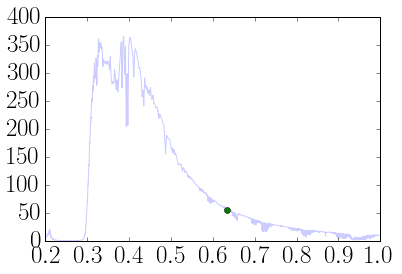

In [270]:
plt.plot(wl, TOA_flux, alpha=0.2)
plt.plot(shelf.jc_ubvri.R.bandcenter, f, 'o')
plt.xlim([0.2,1.0])

(0.2, 1.0)

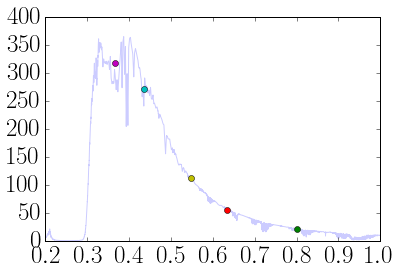

In [278]:
plt.plot(wl, TOA_flux, alpha=0.2)
wheel = shelf.jc_ubvri
for attr, value in wheel.__dict__.iteritems():
    f = convolve_filter_response(wl, TOA_flux, value.wl, value.response)
    wlc = value.bandcenter
    plt.plot(wlc, f, 'o')
plt.xlim([0.2,1.0])

[]

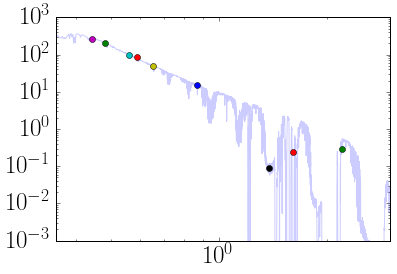

In [277]:
plt.plot(wl, TOA_flux, alpha=0.2)
for attr, value in shelf.landsat.__dict__.iteritems():
    f = convolve_filter_response(wl, TOA_flux, value.wl, value.response)
    wlc = value.bandcenter
    plt.plot(wlc, f, 'o')
plt.xlim([0.35,3.0])
plt.ylim([1e-3, 1e3])
plt.loglog()

In [279]:
class landsat(Wheel):
    
    def __init__(self):
        
        wl, response, LANDSAT_names, FWHM, bandcenters = read_landsat()
        
        self.CA=Filter(name=LANDSAT_names[0], bandcenter=bandcenters[0], FWHM=FWHM[0], wl=wl[0], response=response[0])
        self.B=Filter(name=LANDSAT_names[1], bandcenter=bandcenters[1], FWHM=FWHM[1], wl=wl[1], response=response[1])
        self.G=Filter(name=LANDSAT_names[2], bandcenter=bandcenters[2], FWHM=FWHM[2], wl=wl[2], response=response[2])
        self.R=Filter(name=LANDSAT_names[3], bandcenter=bandcenters[3], FWHM=FWHM[3], wl=wl[3], response=response[3])
        self.NIR=Filter(name=LANDSAT_names[4], bandcenter=bandcenters[4], FWHM=FWHM[4], wl=wl[4], response=response[4])
        self.SWIR1=Filter(name=LANDSAT_names[5], bandcenter=bandcenters[5], FWHM=FWHM[5], wl=wl[5], response=response[5])
        self.SWIR2=Filter(name=LANDSAT_names[6], bandcenter=bandcenters[6], FWHM=FWHM[6], wl=wl[6], response=response[6])
        self.Pan=Filter(name=LANDSAT_names[7], bandcenter=bandcenters[7], FWHM=FWHM[7], wl=wl[7], response=response[7])
        self.Cirrus=Filter(name=LANDSAT_names[8], bandcenter=bandcenters[8], FWHM=FWHM[8], wl=wl[8], response=response[8])

In [280]:
ls = landsat()

In [282]:
ls